# Assignment 1 - Outlier Detection

*Due: Friday, 28 November, 2025 at 17:00 CET*

For the first assignment of the course Applications of Machine Learning (INFOB3APML), you will learn to use decision tree, random forest, and isolation forest to detect an outlier class. The objectives of this assignment are:
- use the supervised classification algorithms to classify outliers in real-life data sets
- perform cross validation and fine-tune the model parameters of each algorithm
- use the unsupervised outlier detection algorithms to detect outliers in real-life data sets
- calculate model performance (e.g., accuracy, recall, precision, f1)
- design experiments to compare performance of algorithms
- reflect on the difference between different models


This assignment includes three algorithms: DT, RF, and IF. The first task is to perform data exploration. In Task 2-4, you will use the three algorithms to classify outliers, respectively. In Task 5, you will compare the algorithms and evaluate their results. Please note that Task 2-4 have the following structure:
1. First, find the library (e.g., sklearn examples) and try out the algorithm by simply training the model on the training data (do not consider any parameters or cross validation just yet); 
2. Train the model with the training data by using cross validation and find the best parameter setting for the parameters of interest;
3. Report the average validation accuracy, recall, precision, and F1 scores of all validation sets;
4. Finally, test the optimal model that has the best fitting parameters on your (held-out) test data, and report the test accuracy, precision, recall, and F1. 

Note that, in Task 5, you will need all the calculated accuracy, precision, recall and F1 measures from previous tasks. Make sure you save these to a list or dictionary so you can easily evaluate and compare the results. 




## Task 1: Exploring the data set
 
 

### Data set: Bank Marketing


Import the file *dataBank-additional-full_normalised.csv* to load the preprocessed data set. "*The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.*"


Use the column "label" as the response variable:
- The instances labeled with 1 are the "outliers", in this case the class we would like to detect accurately; 
- The instance labeled with 0 are the "inliers".


The original data description can be found via the link here below. You will also find some explanations regarding the features under the section "Attribute Information".  
https://archive.ics.uci.edu/ml/datasets/bank+marketing





In [1]:
# Import packages
import pandas as pd
import numpy as np

# Elke row wil ik zien
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Import data
data = pd.read_csv('./dataBank-additional-full_normalised_sampled.csv', sep=',')
data.columns

Index(['age', 'job=housemaid', 'job=services', 'job=admin.', 'job=blue-collar',
       'job=technician', 'job=retired', 'job=management', 'job=unemployed',
       'job=self-employed', 'job=unknown', 'job=entrepreneur', 'job=student',
       'marital=married', 'marital=single', 'marital=divorced',
       'marital=unknown', 'education=basic.4y', 'education=high.school',
       'education=basic.6y', 'education=basic.9y',
       'education=professional.course', 'education=unknown',
       'education=university.degree', 'education=illiterate', 'default=0',
       'default=unknown', 'default=1', 'housing=0', 'housing=1',
       'housing=unknown', 'loan=0', 'loan=1', 'loan=unknown',
       'contact=cellular', 'month=may', 'month=jun', 'month=jul', 'month=aug',
       'month=oct', 'month=nov', 'month=dec', 'month=mar', 'month=apr',
       'month=sep', 'day_of_week=mon', 'day_of_week=tue', 'day_of_week=wed',
       'day_of_week=thu', 'day_of_week=fri', 'duration', 'campaign', 'pdays',
       'p

array([[<Axes: title={'center': 'age'}>]], dtype=object)

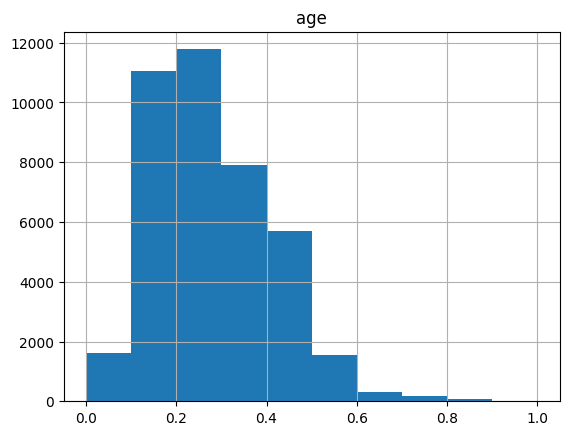

In [2]:
import seaborn as sns
data.hist(column='age')


c:\Users\lina_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


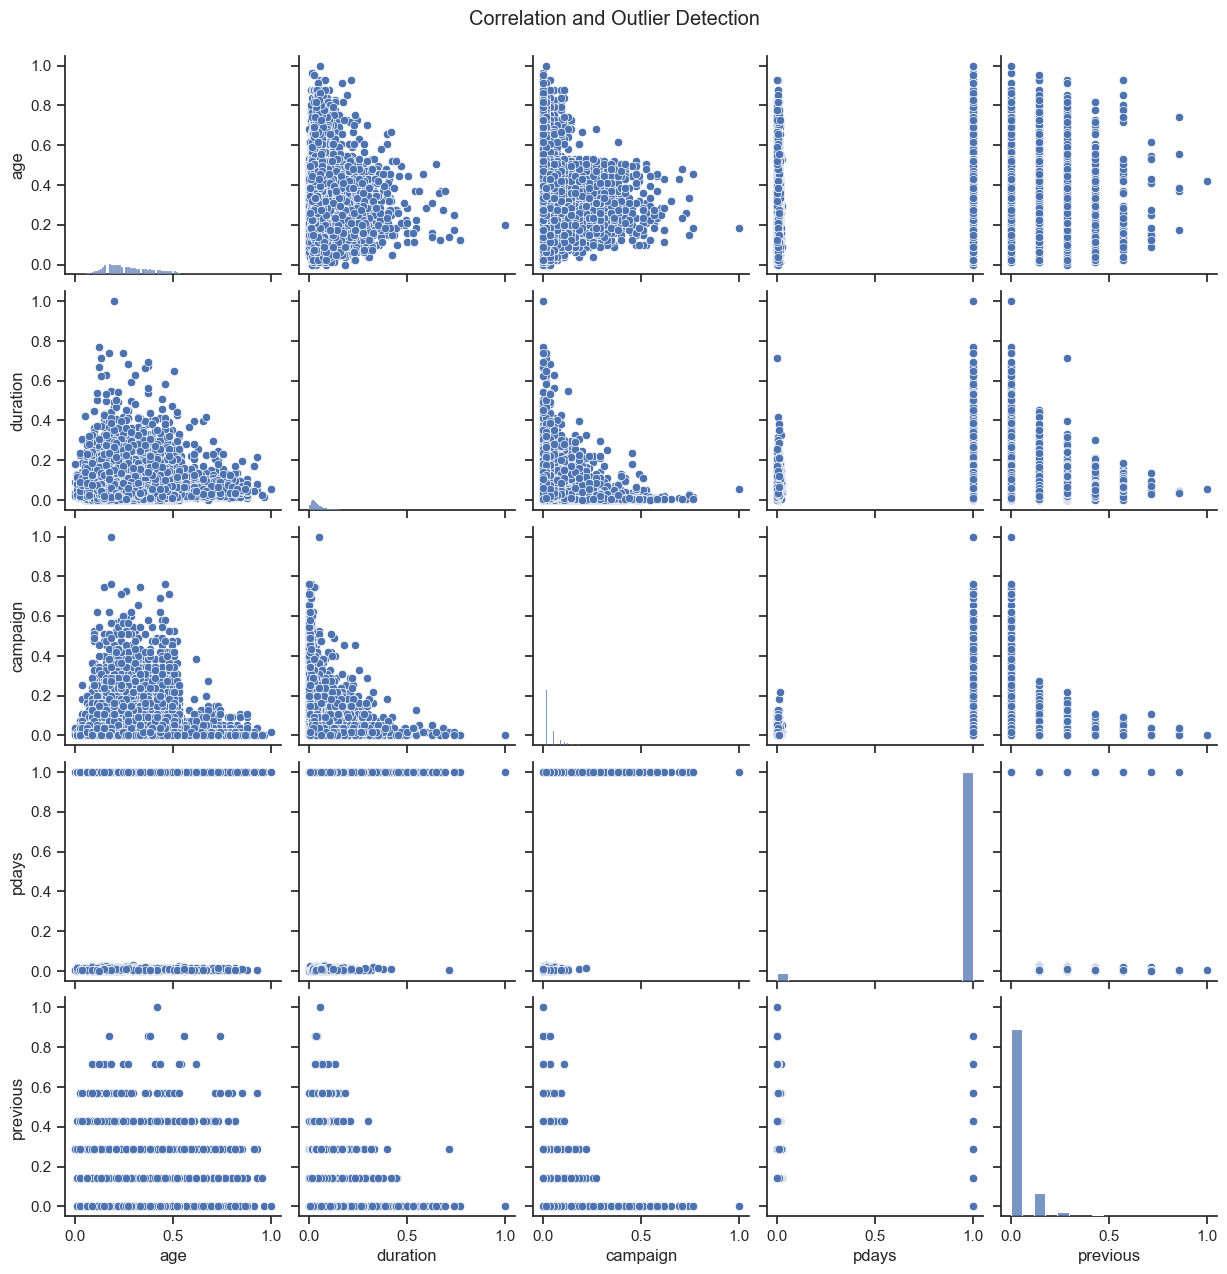

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
# fig = plt.figure(figsize=(45,30))
# sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)
# plt.show()

features = ['age', 'job=housemaid', 'job=services', 'job=admin.', 'job=blue-collar',
       'job=technician', 'job=retired', 'job=management', 'job=unemployed',
       'job=self-employed', 'job=unknown', 'job=entrepreneur', 'job=student',
       'marital=married', 'marital=single', 'marital=divorced',
       'marital=unknown', 'education=basic.4y', 'education=high.school',
       'education=basic.6y', 'education=basic.9y',
       'education=professional.course', 'education=unknown',
       'education=university.degree', 'education=illiterate', 'default=0',
       'default=unknown', 'default=1', 'housing=0', 'housing=1',
       'housing=unknown', 'loan=0', 'loan=1', 'loan=unknown',
       'contact=cellular', 'month=may', 'month=jun', 'month=jul', 'month=aug',
       'month=oct', 'month=nov', 'month=dec', 'month=mar', 'month=apr',
       'month=sep', 'day_of_week=mon', 'day_of_week=tue', 'day_of_week=wed',
       'day_of_week=thu', 'day_of_week=fri', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome=nonexistent', 'poutcome=failure',
       'poutcome=success', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'class']

# for feat in features:
#     sns.countplot(x=feat,data=data, )
#     plt.xticks(rotation=45, ha="right")
#     plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Choose numeric columns only (your uploaded image shows numeric data)
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']

sns.set(style="ticks")
sns.pairplot(data[numeric_cols], diag_kind="hist")
plt.suptitle("Correlation and Outlier Detection", y=1.02)
plt.show()
    


### 1.1. Exploratory data analysis

For the data set, create 2-3 figures and tables that will help you understand the data. 


During the data exploration, you, as a team, are trying to get an impression about the data. You will create figures and/or tables that help you to get to know the data. While exploring the data, you may also consider answering the following questions, which may help you understand the data better. For example, 

- How many instances are there in each class? Are the classes imbalanced?
- How many variables are in the data? What is the data type and the distribution of each variable? 
- Are the variables informative?
- Are any pair of the potential predictor variables highly correlated?
- (Should the variables be normalized or not?)
- (Any relevant, useful preprocessing steps that may be taken?)

#### Tips: 

Make sure to at least check the data type of each variable and to understand the distribution of each variable, especially the response variable. 

Try to find out what factors seem to determine whether an instance is an outlier or not. What do you conclude?

*For creating data visualizations, you may consider using the matplot library and visit the [matplot gallery](https://matplotlib.org/stable/gallery/index.html) for inspiration (e.g., histograms for distribution, or heatmaps for feature correlation).*



In [4]:
# dit zijn de variabelen typen
data.dtypes

age                              float64
job=housemaid                      int64
job=services                       int64
job=admin.                         int64
job=blue-collar                    int64
job=technician                     int64
job=retired                        int64
job=management                     int64
job=unemployed                     int64
job=self-employed                  int64
job=unknown                        int64
job=entrepreneur                   int64
job=student                        int64
marital=married                    int64
marital=single                     int64
marital=divorced                   int64
marital=unknown                    int64
education=basic.4y                 int64
education=high.school              int64
education=basic.6y                 int64
education=basic.9y                 int64
education=professional.course      int64
education=unknown                  int64
education=university.degree        int64
education=illite

In [5]:
features = ['age', 'job=housemaid', 'job=services', 'job=admin.', 'job=blue-collar',
       'job=technician', 'job=retired', 'job=management', 'job=unemployed',
       'job=self-employed', 'job=unknown', 'job=entrepreneur', 'job=student',
       'marital=married', 'marital=single', 'marital=divorced',
       'marital=unknown', 'education=basic.4y', 'education=high.school',
       'education=basic.6y', 'education=basic.9y',
       'education=professional.course', 'education=unknown',
       'education=university.degree', 'education=illiterate', 'default=0',
       'default=unknown', 'default=1', 'housing=0', 'housing=1',
       'housing=unknown', 'loan=0', 'loan=1', 'loan=unknown',
       'contact=cellular', 'month=may', 'month=jun', 'month=jul', 'month=aug',
       'month=oct', 'month=nov', 'month=dec', 'month=mar', 'month=apr',
       'month=sep', 'day_of_week=mon', 'day_of_week=tue', 'day_of_week=wed',
       'day_of_week=thu', 'day_of_week=fri', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome=nonexistent', 'poutcome=failure',
       'poutcome=success', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'class']

for feat in features:
    print(f"Naam van feature : {feat}")
    print(f"Dit zijn de aantallen : {data[feat].value_counts().unique()}")
    print(f"Dit is de unieke waarde die de attribuut {feat} heeft : {data[feat].unique()}")
    print("\n")

Naam van feature : age
Dit zijn de aantallen : [1893 1812 1782 1742 1722 1706 1672 1437 1415 1402 1381 1248 1142 1121
 1080 1033 1007  993  974  953  912  855  823  820  754  739  722  686
  672  667  635  634  578  561  451  444  279  218  136  101   68   64
   58   54   51   46   41   33   32   30   28   26   24   21   17   15
   14   13    8    7    4    2    1]
Dit is de unieke waarde die de attribuut age heeft : [0.209877 0.296296 0.246914 0.160494 0.530864 0.45679  0.234568 0.382716
 0.148148 0.271605 0.37037  0.358025 0.320988 0.08642  0.135802 0.197531
 0.345679 0.481481 0.333333 0.17284  0.283951 0.222222 0.432099 0.308642
 0.506173 0.469136 0.111111 0.259259 0.185185 0.444444 0.049383 0.123457
 0.419753 0.407407 0.493827 0.098765 0.790123 0.604938 0.641975 0.728395
 0.074074 0.395062 0.061728 0.703704 0.777778 0.518519 0.592593 0.012346
 0.567901 0.839506 0.555556 0.037037 0.024691 0.54321  0.753086 0.654321
 0.62963  0.666667 0.876543 0.691358 0.580247 0.851852 0.679012 0.81

### 1.2. Creating Train and Test data sets

Create a training and a held-out test data set. *Later in Task 2-4, the training data will be used to perform cross-validation. The held-out test data will be used to evaluate the performance of the selected models.*

Choose the size of your test data and motivate your choice when you discuss the experiment setup in your report. 

Tips: 

*You may use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) class provided by sklearn*

In [6]:
# import method to make a train/test split
from sklearn.model_selection import train_test_split

# copy data
df = data.copy()

# create X and y
features = ['age', 'job=housemaid', 'job=services', 'job=admin.', 'job=blue-collar',
       'job=technician', 'job=retired', 'job=management', 'job=unemployed',
       'job=self-employed', 'job=unknown', 'job=entrepreneur', 'job=student',
       'marital=married', 'marital=single', 'marital=divorced',
       'marital=unknown', 'education=basic.4y', 'education=high.school',
       'education=basic.6y', 'education=basic.9y',
       'education=professional.course', 'education=unknown',
       'education=university.degree', 'education=illiterate', 'default=0',
       'default=unknown', 'default=1', 'housing=0', 'housing=1',
       'housing=unknown', 'loan=0', 'loan=1', 'loan=unknown',
       'contact=cellular', 'month=may', 'month=jun', 'month=jul', 'month=aug',
       'month=oct', 'month=nov', 'month=dec', 'month=mar', 'month=apr',
       'month=sep', 'day_of_week=mon', 'day_of_week=tue', 'day_of_week=wed',
       'day_of_week=thu', 'day_of_week=fri', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome=nonexistent', 'poutcome=failure',
       'poutcome=success', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed']
X = df[features]
y = df[['class']]

# TODO: create training data and held-out test data

# stratify heeft te maken met de imbalance van de data. En zorgt ervoor dat de train test split dezelfde ratio heeft van de imablance van de data.
X_, X_heldout, y_, y_heldout = train_test_split(X,y,test_size=0.20, stratify=y)

## Task 2: Decision Trees 
### - Outlier Detection as a Supervised Classification

### 2.1 Training a Decision Tree

Use the basic [Decision Tree](http://scikit-learn.org/stable/modules/tree.html#tree) library in sklearn to learn a decision tree model by fitting the full training data.

Show/plot the tree diagram and also plot the feature importances. 
What do you observe?


#### Tips:

To show the tree diagram, you may use the graphviz library or use the plot_tree function, see https://scikit-learn.org/stable/modules/tree.html




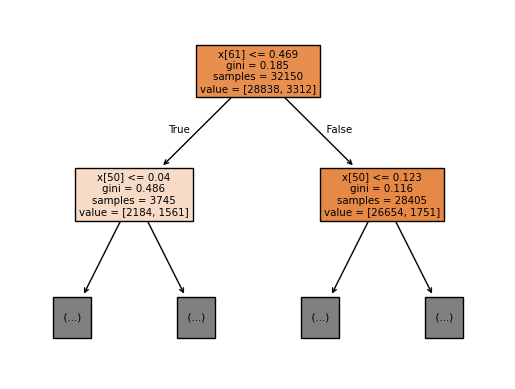

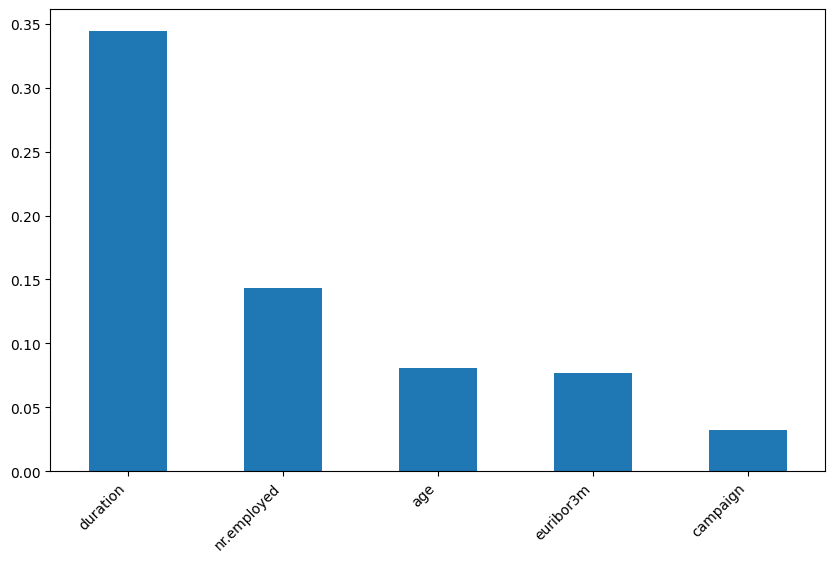

In [7]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# TODO: learn a decision tree using default parameters
cl = tree.DecisionTreeClassifier()
cl = cl.fit(X_, y_)

# TODO: plot the tree
tree.plot_tree(cl, max_depth=1, filled= True)

# TODO: plot the feature importances
importances = pd.Series(cl.feature_importances_, index=features)
top_importances = importances.sort_values(ascending=False).head()

fig, ax = plt.subplots(figsize=(10, 6))
top_importances.plot.bar(ax=ax)

plt.xticks(rotation=45, ha='right')
plt.show()

### 2.2 Confusion Matrix and Accuracy

Compute the *confusion matrix* and *accuracy* of the tree using the held-out data set. Moreover, also compute the *recall*, *precision*, and *F1-score* of the tree. 


For this part, you can either implement your own functions or use the following scikit-learn libraries.  
- [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)
- [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)
- [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)
- [f1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
- [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)


Reflect on the performance of the model and be aware of the difference between *accuracy* and *F1-score*. How good is this decision tree model for outlier detection?

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7210
           1       0.48      0.49      0.49       828

    accuracy                           0.89      8038
   macro avg       0.71      0.72      0.71      8038
weighted avg       0.89      0.89      0.89      8038


Accuracy is : 0.8926
Recall is : 0.494
Precision is : 0.4795
F1-score is : 0.4866


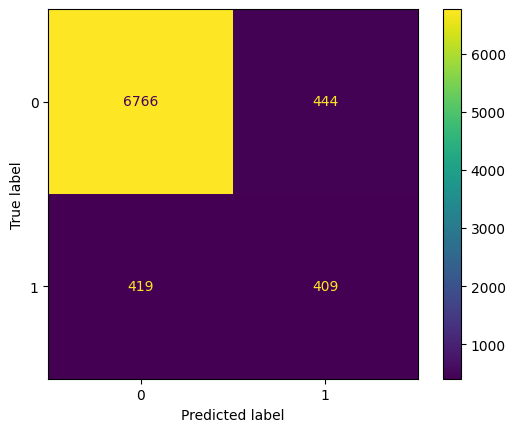

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, ConfusionMatrixDisplay


y_pred = cl.predict(X_heldout)

print(f"{classification_report(y_heldout, y_pred)}")

# TODO: compute accuracy, recall, precision, and f1 score
print(f"\nAccuracy is : {round(accuracy_score(y_heldout,y_pred), 4)}")
print(f"Recall is : {round(recall_score(y_heldout, y_pred),4)}")
print(f"Precision is : {round(precision_score(y_heldout, y_pred),4)}")
print(f"F1-score is : {round(f1_score(y_heldout, y_pred), 4)}")

confusionMatrix = confusion_matrix(y_heldout, y_pred, labels=cl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix,
                              display_labels=cl.classes_)
disp.plot()
plt.show()

### 2.3 Features to Tree  (optional)

Use the training data to re-fit a new decision tree with the parameter max_depth set to 4. Show the tree diagram and also plot the feature importances. 

Recalculate the performance of this simpler model. 

What do you observe?


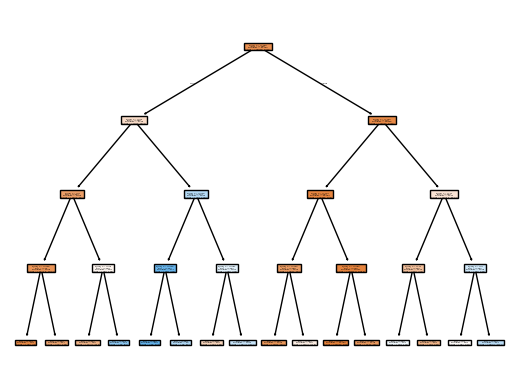

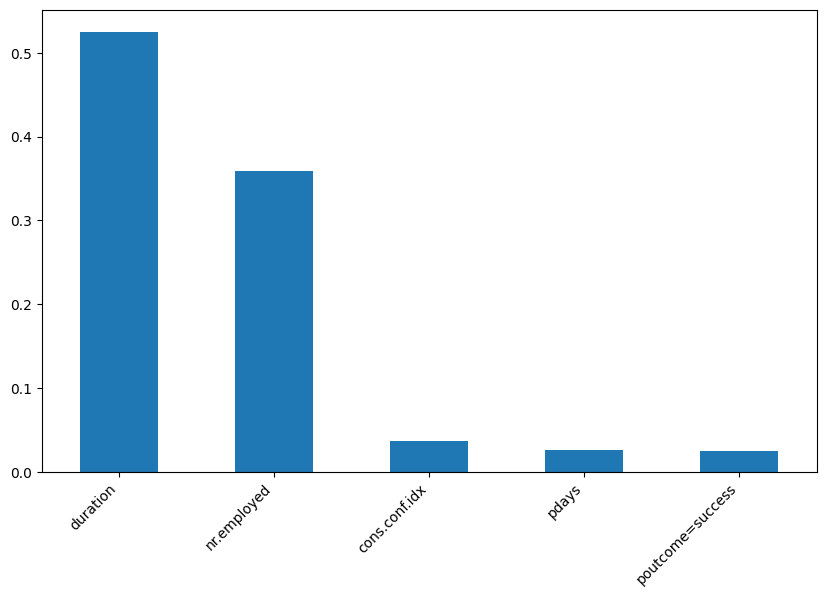

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7210
           1       0.59      0.48      0.53       828

    accuracy                           0.91      8038
   macro avg       0.77      0.72      0.74      8038
weighted avg       0.91      0.91      0.91      8038


Accuracy is : 0.9128
Recall is : 0.4831
Precision is : 0.5944
F1-score is : 0.533


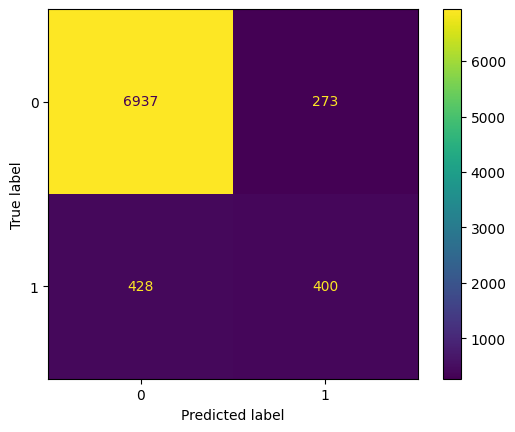

In [9]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# TODO: learn a decision tree with maximal depth 4
maxDiepte = 4

cl = tree.DecisionTreeClassifier(max_depth = maxDiepte)
cl = cl.fit(X_, y_)

# TODO: plot the tree
tree.plot_tree(cl, max_depth=4, filled= True)

# TODO: plot the feature importances
importances = pd.Series(cl.feature_importances_, index=features)
top_importances = importances.sort_values(ascending=False).head()

fig, ax = plt.subplots(figsize=(10, 6))
top_importances.plot.bar(ax=ax)
plt.xticks(rotation=45, ha='right')
plt.show()

# TODO: compute accuracy, recall, precision, and f1 score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, ConfusionMatrixDisplay

y_pred = cl.predict(X_heldout)

# TODO: compute accuracy, recall, precision, and f1 score
print(f"{classification_report(y_heldout, y_pred)}")
print(f"\nAccuracy is : {round(accuracy_score(y_heldout,y_pred), 4)}")
print(f"Recall is : {round(recall_score(y_heldout, y_pred),4)}")
print(f"Precision is : {round(precision_score(y_heldout, y_pred),4)}")
print(f"F1-score is : {round(f1_score(y_heldout, y_pred), 4)}")

confusionMatrix = confusion_matrix(y_heldout, y_pred, labels=cl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix,
                              display_labels=cl.classes_)
disp.plot()
plt.show()

### 2.4 Cross validation (optional)

The code example shown here below uses the [kfold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) method to implement 5-fold cross-validation. Moreover, it uses the cross validation to explore how the max_depth influences the model performance. It keeps track of the validation accuracy scores and F1-scores across the 5 folds. 


Now, change the code to also compute the recall and precision. 


In [10]:
from sklearn.model_selection import KFold

# create 5-fold cross-validation
nk = 5
kf = KFold(n_splits=nk, random_state=0, shuffle=True)

C = np.arange(2, 10,)

acc = np.zeros((nk , 8))
f1 = np.zeros((nk , 8))
recall = np.zeros((nk, 8))
precision = np.zeros((nk, 8))

i = 0
for train_index , val_index in kf.split(X_):
    X_t, X_val = X_.iloc[train_index], X_.iloc[val_index]
    y_t, y_val = y_.iloc[train_index], y_.iloc[val_index]
    j = 0
    for c in C:
        dt = tree.DecisionTreeClassifier(min_samples_leaf = 1, max_depth = c) 
        dt.fit(X_t, y_t)
        yhat = dt.predict(X_val)
        acc[i][j] = accuracy_score(yhat , y_val)
        f1[i][j] = f1_score(yhat , y_val)

        recall[i][j] = recall_score(yhat, y_val)
        precision[i][j] = precision_score(yhat, y_val)
        
        j = j + 1
    i = i + 1
    
print('Mean accuracy: ' + str(np.mean(acc , axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(acc , axis = 0))) + '\n')

print('Mean F1: ' + str(np.mean(f1 , axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(f1 , axis = 0))) + '\n')

print('Recall: ' + str(np.mean(recall , axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(recall , axis = 0))) + '\n')

print('Precision: ' + str(np.mean(precision , axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(precision , axis = 0))) + '\n')

Mean accuracy: [0.90954899 0.91337481 0.91860031 0.92024883 0.91838258 0.91819596
 0.91760498 0.9155521 ]
Selected model index: 3

Mean F1: [0.46544787 0.5114623  0.54480638 0.56845894 0.55858763 0.57068032
 0.56834796 0.56164938]
Selected model index: 5

Recall: [0.59670958 0.61455757 0.64201788 0.64288736 0.63058657 0.62238962
 0.61880613 0.60422654]
Selected model index: 3

Precision: [0.38269561 0.45354749 0.4736095  0.51230411 0.50169878 0.52778765
 0.52790363 0.52573125]
Selected model index: 6



### 2.5 Tree Tuning



The built-in decision tree algorithm you are using has several parameters which you can tune (e.g., *max_depth* and *min_samples_leaf*). Use 5-fold cross-validation (e.g., reuse the code of task 2.4 and adapt the code for two parameters), show how the choice of these parameters affects performance. 


#### Tips: 
Make a decision on the range of values that you would try for the two parameters and discuss your choice in the experiment setup section.

Here is a guide that helps you to build the experiment.
First, reuse the code of task 2.4 and show how max_depth affects train and **validation accuracy**. On a single axis, plot train and **validation accuracy** as a function of max_depth. Use a red line to show validation accuracy and a blue line to show train accuracy. (Do not use your (held-out) **test data** yet). 

Second, show how validation accuracy relates to both max_depth and min_samples_leaf. Specifically, create a 3-D plot where the x-axis is max_depth, the y-axis is min_samples_leaf, and the z-axis shows accuracy. What combination of max_depth and min-samples_leaf achieves the highest F1 score? How sensitive are the results to these two parameters? 

Finally, select the best-performing decision tree (i.e., the one that achieved the highest cross-validated performance) and report the performance of the fitted model on the held-out test data -- how does it compare to the cross-validated F1 score?


              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7210
           1       0.59      0.48      0.53       828

    accuracy                           0.91      8038
   macro avg       0.77      0.72      0.74      8038
weighted avg       0.91      0.91      0.91      8038


Accuracy is : 0.9123
Recall is : 0.4807
Precision is : 0.5914
F1-score is : 0.5303


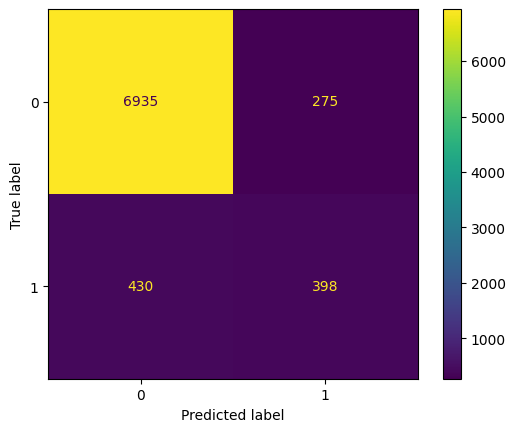

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

aantalFolds = 5
random_state = 0
Bovengrens = 6

max_depth = np.arange(1, Bovengrens + 1)
min_samples_leaf = np.arange(1, Bovengrens + 1)

kf = KFold(n_splits=aantalFolds, shuffle=True, random_state=random_state)

scores = np.zeros((len(max_depth), len(min_samples_leaf)), dtype=float)

for fold_idx, (train_index, val_index) in enumerate(kf.split(X_)):
    X_train, X_val = X_.iloc[train_index], X_.iloc[val_index]
    y_train, y_val = y_.iloc[train_index], y_.iloc[val_index]
    for i, maximaleDiepte in enumerate(max_depth):
        for j, minSampleLeaf in enumerate(min_samples_leaf):
            clf = DecisionTreeClassifier(max_depth=int(maximaleDiepte), min_samples_leaf=int(minSampleLeaf), random_state=random_state)
            clf.fit(X_train, y_train)
            yhat = clf.predict(X_val)

            fold_f1 = f1_score(y_val, yhat)
            scores[i, j] += fold_f1

mean_f1 = scores / float(aantalFolds)

best_idx = np.unravel_index(np.argmax(mean_f1), mean_f1.shape)
best_max_depth = int(max_depth[best_idx[0]])
best_min_samples_leaf = int(min_samples_leaf[best_idx[1]])
best_score = mean_f1[best_idx]

Fclf = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, random_state=random_state)
Fclf.fit(X_, y_)

y_pred = Fclf.predict(X_heldout)

print(f"{classification_report(y_heldout, y_pred)}")
print(f"\nAccuracy is : {round(accuracy_score(y_heldout,y_pred), 4)}")
print(f"Recall is : {round(recall_score(y_heldout, y_pred),4)}")
print(f"Precision is : {round(precision_score(y_heldout, y_pred),4)}")
print(f"F1-score is : {round(f1_score(y_heldout, y_pred), 4)}")

confusionMatrix = confusion_matrix(y_heldout, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix,
                              display_labels=Fclf.classes_)
disp.plot()
plt.show()

## Task 3. Random Forest
### - Outlier Detection as a Supervised Classification

Now use a [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to predict the labels for the data set. 

i) use the default values for the parameters to get a RF model running. 

ii) use 5-fold cross-validation to determine a possibly better choice for the parameter *n_estimators* and *max_features*
    
iii) select the best-performing decision tree (i.e., the one that achieved the highest cross-validated performance) and report the performance of the fitted model on the held-out test data ?

In the report, reflect on how does the test performance of RF compare to the decision tree performance? 
 



In [12]:
from sklearn.ensemble import RandomForestClassifier

# TODO: create 5-fold cross-validation
nFolds = 5
splitskfold = KFold(nFolds, random_state=0, shuffle=True)

# TODO: set the search space of the parameters
nTrees = [10, 50, 100]
maxFeatures = [5, 10, 20]

# TODO: learn an optimal random forest model
n_combinations = len(nTrees) * len(maxFeatures)
acc = np.zeros((nFolds , n_combinations))
recall = np.zeros((nFolds , n_combinations))
precision = np.zeros((nFolds , n_combinations))
f1 = np.zeros((nFolds , n_combinations))

# TODO: compute the performance of the model on your held-out test data
i = 0
for train_index , val_index in splitskfold.split(X_):
    X_train, X_val = X_.iloc[train_index], X_.iloc[val_index]
    y_train, y_val = y_.iloc[train_index], y_.iloc[val_index]
    
    j = 0
    for nTree in nTrees:
        for maxFeat in maxFeatures:
            rf = RandomForestClassifier(n_estimators=nTree, max_features=maxFeat, random_state=0)

            rf.fit(X_train, y_train.values.ravel())

            # Predict on validation set
            y_pred = rf.predict(X_val)

            acc[i][j] = accuracy_score(y_val, y_pred)
            recall[i][j] = recall_score(y_val, y_pred)
            precision[i][j] = precision_score(y_val, y_pred)
            f1[i][j] = f1_score(y_val, y_pred)

            j += 1
    i += 1

best_i = np.argmax(np.mean(acc , axis = 0))
best_nTrees = nTrees[best_i // len(maxFeatures)]
best_maxFeatures = maxFeatures[best_i % len(maxFeatures)]

print(f"Best nTrees: {best_nTrees}, Best maxFeatures: {best_maxFeatures}")

mean_acc = np.mean(acc , axis = 0)
mean_recall = np.mean(recall , axis = 0)
mean_precision = np.mean(precision , axis = 0)
mean_f1 = np.mean(f1 , axis = 0)

print('Mean accuracy: ' + str(mean_acc))
print('Selected model index: ' + str(best_i))
print('Mean recall: ' + str(mean_recall))
print('Mean precision: ' + str(mean_precision))
print('Mean F1: ' + str(mean_f1))


optimal_rf = RandomForestClassifier(n_estimators=best_nTrees, max_features=best_maxFeatures, random_state=0)
optimal_rf.fit(X_, y_.values.ravel())

y_heldout_pred = optimal_rf.predict(X_heldout)

print(f"Accuracy on held-out test data: {round(accuracy_score(y_heldout, y_heldout_pred), 4)}")
print(f"Recall on held-out test data: {round(recall_score(y_heldout, y_heldout_pred),4)}")
print(f"Precision on held-out test data: {round(precision_score(y_heldout, y_heldout_pred),4)}")
print(f"F1-score on held-out test data: {round(f1_score(y_heldout, y_heldout_pred), 4)}")



Best nTrees: 100, Best maxFeatures: 20
Mean accuracy: [0.91153966 0.91297045 0.9148056  0.91449456 0.91757387 0.91807154
 0.91452566 0.91804044 0.91888025]
Selected model index: 8
Mean recall: [0.34811482 0.40195167 0.44675119 0.37137465 0.45513372 0.48899248
 0.37193171 0.46076455 0.5012224 ]
Mean precision: [0.6285149  0.62002016 0.62043956 0.64950616 0.64129227 0.63357851
 0.64909038 0.64379451 0.63546553]
Mean F1: [0.44793813 0.48725605 0.51928292 0.47219994 0.53216025 0.55150643
 0.47265317 0.53668042 0.56016873]
Accuracy on held-out test data: 0.917
Recall on held-out test data: 0.4964
Precision on held-out test data: 0.6218
F1-score on held-out test data: 0.552


## Task 4. Isolation Forest

### 4.1 Apply Isolation Forest
### - Outlier Detection as an Unsupervised Classification

Use the [Isolation Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) to detect potential outliers in the data set. 

Select two parameters that you would like to investigate (for example, contamination, max_depth, n_estimators, max_samples). For each configuration: 

i) Apply Isolation Forest on the full data set (without using the labels Y)


ii) Use the labels to compute the accuracy, recall, precision, and F1-score on the full data set (using the labels). 


Compare the performance of Isolation Forest of different configurations. 


#### Tips:

- Note that the fit(X) function of the Isolation Forest does not use the labels. 


- **Look carefully at the values that an Isolation Forest classifier returns. Which value represents the outlier class? Be aware that you need to implement a mapping function f(x) that remaps -1 to 1 and 1 to 0, in order to transform the predictions such that the semantics are consistant with the previous classification algorithms.**


- Create 2D (or 3D) plots to visualize your results



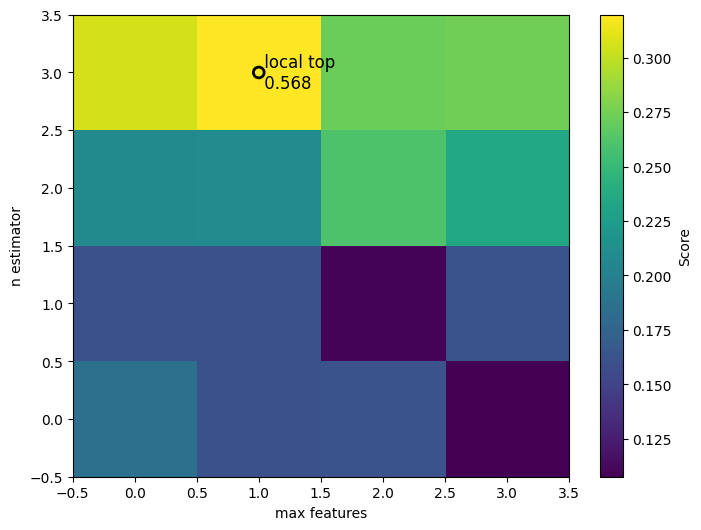

Beste score op beste model : 0.320, Beste score 0.320
n_estimators: 4, max_features: 2


In [13]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score

# TODO: set the search space of the parameters
# Parameters : {n_estimators}, {max_samples}

Bovengrens = 5

estimator = np.arange(1, Bovengrens) 
maxfeatures = np.arange(1, Bovengrens)

score = np.zeros((len(estimator), len(maxfeatures)))

# TODO: apply the configured Isolation Forest model on the test set. 
for i, n in enumerate(estimator): 
    for j, k in enumerate(maxfeatures):
        algoritme = IsolationForest(random_state=0, n_estimators = n, max_features= k)
        algoritme.fit(X_)

        y_pred = algoritme.predict(X_heldout)
        y_pred_mapping = (y_pred == -1).astype(int)

        score[i,j] = f1_score(y_heldout, y_pred_mapping)


# TODO: return the optimal Isolation Forest model
bestidx = np.unravel_index(np.argmax(score), score.shape)
best_estimator = int(estimator[bestidx[0]])
best_features = int(maxfeatures[bestidx[1]])
beste_score = score[bestidx]

plt.figure(figsize=(8,6))
im = plt.imshow(score, origin='lower', aspect='auto', cmap='viridis')
plt.scatter(bestidx[1], bestidx[0], marker='o', s=60, linewidths=2, facecolors='none', edgecolors='black')
plt.text(bestidx[1], bestidx[0], f' local top\n {best_score:.3f}', color='black', va='center', ha='left', fontsize=12)

plt.xlabel('max features')
plt.ylabel('n estimator')
plt.colorbar(im, label = "Score")
plt.show()

# # TODO: compute the performance of the model
best_model = IsolationForest(random_state=0, n_estimators=best_estimator, max_features=best_features)
best_model.fit(X_)
y_pred = best_model.predict(X_heldout)
y_pred_mapping = (y_pred == -1).astype(int)
print(f"Beste score op beste model : {f1_score(y_heldout, y_pred_mapping):.3f}, Beste score {beste_score:.3f}")
print(f"n_estimators: {best_estimator}, max_features: {best_features}")


### 4.2 Outlier Detection - Analyze Outliers

Taking the best performing Isolation Forest model from Task 4.1, enrich the data set with the predicted labels (or scores) by the model. 

Perform one or two analyses to show the characteristics of the outliers. 

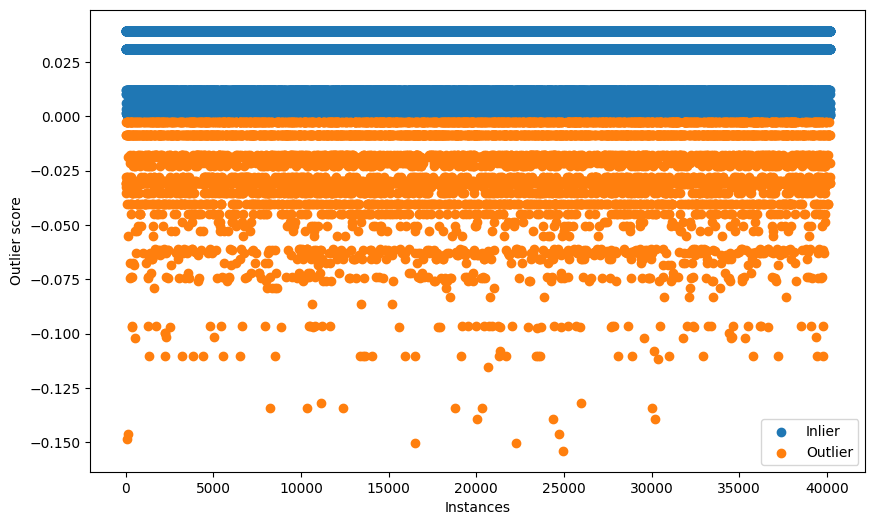

In [14]:
from sklearn.ensemble import IsolationForest
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# TODO: enrich the data with the anomaly scores assigned by the optimal model. 
besteEstimator = 4
besteMaxFeatures = 2

clf = IsolationForest(n_estimators=besteEstimator, max_features=besteMaxFeatures)
clf.fit(X)
data = data.loc[X.index].copy()
data['outliers_score'] = clf.decision_function(X) # score
data['outliers'] = clf.predict(X)

# TODO: Perform one or two analyses to show the characteristics of the outliers. 
plt.figure(figsize=(10,6))
inlier = data[data['outliers'] == 1]
outlier = data[data['outliers'] == -1]

plt.scatter(inlier.index, inlier['outliers_score'], label = "Inlier")
plt.scatter(outlier.index, outlier['outliers_score'], label = "Outlier")
plt.xlabel('Instances')
plt.ylabel('Outlier score')
plt.legend()
plt.show()


## Task 5. Report your results and discuss your findings

### 5.1 Compare the performances 

By now, you have applied three algorithms with different parameters on the data set. For each algorithm, you have create tables or figures which you can add to your report. Discuss the results and their optimal performance. 

Create an overview table or figure that show the optimal performance of each algorithm on the data set, for example see the table here below. 

Discuss your findings in the report and reflect on the following questions:
- According to the performance results, which one is the optimal model? 
- How large is the difference between the accuracy score and the F1 score for each model? What caused the difference?
- Which of performance measures (the accuracy score, recall, precision, or F1-score) would you use for comparing the model performance? Why?
- You are comparing the performance of supervised algorithms (DT and RF) with an unsupervised algorithm (Isolation Forest). Is this a fair comparison? Motivate your answer. 



| Model | Validation Accuracy  | Test Accuracy |  Validation Recall  |  Test Recall  | Validation F1 | Test F1 |... |
|------|------|------|------|------|------|------|-----|
|   Decision Tree        |  |  | | | | |
|   Random Forest  |  |  | || | |
|   Isolation Forest        |  |  | || | |



In [15]:
# TODO: Create an overview table or figure that show the optimal performance of each algorithm on the data set
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

# Define a helper function to calculate metrics
def get_metrics(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'Test Accuracy': round(accuracy_score(y_true, y_pred), 4),
        'Test Recall': round(recall_score(y_true, y_pred), 4),
        'Test Precision': round(precision_score(y_true, y_pred), 4),
        'Test F1': round(f1_score(y_true, y_pred), 4)
    }

# Decision Tree Metrics
y_pred_dt = cl.predict(X_heldout)
metrics_dt = get_metrics(y_heldout, y_pred_dt, 'Decision Tree')

# Random Forest Metrics
y_pred_rf = optimal_rf.predict(X_heldout)
metrics_rf = get_metrics(y_heldout, y_pred_rf, 'Random Forest')

# Isolation Forest Metrics
# Note: Isolation Forest predicts -1 for outliers and 1 for inliers.
# We need to map -1 to 1 (outlier) and 1 to 0 (inlier) to match y_heldout labels.
y_pred_if_raw = best_model.predict(X_heldout)
y_pred_if = (y_pred_if_raw == -1).astype(int)
metrics_if = get_metrics(y_heldout, y_pred_if, 'Isolation Forest')

# Create DataFrame
results_df = pd.DataFrame([metrics_dt, metrics_rf, metrics_if])

# Display the table
display(results_df)

,Model,Test Accuracy,Test Recall,Test Precision,Test F1
0,Decision Tree,0.9128,0.4831,0.5944,0.5330
1,Random Forest,0.9170,0.4964,0.6218,0.5520
2,Isolation Forest,0.8190,0.4130,0.2609,0.3198


### 5.2 Analyze and discuss the results

For each optimal model, enrich your test set by adding the predicted labels by this model to the test set. Can you think of an analysis that gives insights into when the model performs poorly?

Discuss the analysis and insights in the report

Optimal Model based on Test F1: Random Forest


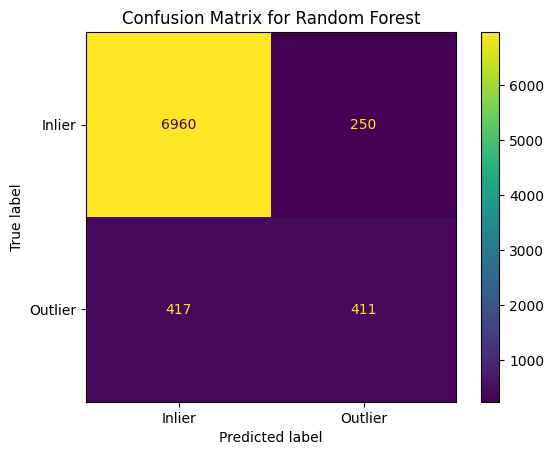


Number of False Negatives: 417
Sample False Negatives:


,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,job=unknown,job=entrepreneur,job=student,marital=married,marital=single,marital=divorced,marital=unknown,education=basic.4y,education=high.school,education=basic.6y,education=basic.9y,education=professional.course,education=unknown,education=university.degree,education=illiterate,default=0,default=unknown,default=1,housing=0,housing=1,housing=unknown,loan=0,loan=1,loan=unknown,contact=cellular,month=may,month=jun,month=jul,month=aug,month=oct,month=nov,month=dec,month=mar,month=apr,month=sep,day_of_week=mon,day_of_week=tue,day_of_week=wed,day_of_week=thu,day_of_week=fri,duration,campaign,pdays,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Actual,predictedClass
248,0.148148,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.115291,0.000000,1.0,0.0,1,0,0,1.000000,0.669135,0.338912,0.980050,1.000000,1,0
18847,0.395062,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.311509,0.000000,1.0,0.0,1,0,0,1.000000,0.484412,0.615063,0.981410,1.000000,1,0
20927,0.197531,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.051037,0.000000,1.0,0.0,1,0,0,0.000000,0.089634,1.000000,0.021990,0.203781,1,0
21191,0.197531,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.148231,0.018182,1.0,0.0,1,0,0,1.000000,0.669135,0.338912,0.981410,1.000000,1,0
28861,0.185185,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.100651,0.000000,1.0,0.0,1,0,0,0.333333,0.340608,0.154812,0.175924,0.512287,1,0


In [16]:
# TODO: For each optimal model, enrich your test set by adding the predicted labels
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Identify optimal model (based on F1 score from previous step)
# We use the one with highest F1 from the results_df.

best_model_name = results_df.loc[results_df['Test F1'].idxmax()]['Model']
print(f"Optimal Model based on Test F1: {best_model_name}")

if best_model_name == 'Decision Tree':
    y_pred_optimal = y_pred_dt
    optimal_clf = cl
elif best_model_name == 'Random Forest':
    y_pred_optimal = y_pred_rf
    optimal_clf = optimal_rf
else:
    y_pred_optimal = y_pred_if
    optimal_clf = best_model

# Create enriched DataFrame
test_analysis_df = X_heldout.copy()
test_analysis_df['Actual'] = y_heldout
test_analysis_df['predictedClass'] = y_pred_optimal

# Analysis: Confusion Matrix
cm = confusion_matrix(y_heldout, y_pred_optimal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Inlier', 'Outlier'])
disp.plot()
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

# Analysis: Inspect False Negatives (Outliers predicted as Inliers)
fn_mask = (test_analysis_df['Actual'] == 1) & (test_analysis_df['predictedClass'] == 0)
false_negatives = test_analysis_df[fn_mask]
print(f"\nNumber of False Negatives: {len(false_negatives)}")
if not false_negatives.empty:
    print("Sample False Negatives:")
    display(false_negatives.head())

## Bonus Tasks 

We would like to challenge you with the following bonus tasks. For each task that is successfully completed, you may obtain max. 0.5 extra point. 

### Bonus Task 1

Implement another outlier detection algorithm (for example, LOF, OC-SVM, Autoencoder) or design your own outlier detection algorithm that achieves a better F1 score. 




In [17]:
# Bonus Task 1: Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Initialize LOF
# n_neighbors=20 is a common default, contamination is set to the proportion of outliers in the training set
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.11, novelty=True)

# Train LOF on training data (X_)
lof.fit(X_)

# Predict on held-out test data (X_heldout)
y_pred_lof = lof.predict(X_heldout)

# Convert predictions: -1 (outlier) -> 1, 1 (inlier) -> 0
y_pred_lof = [1 if x == -1 else 0 for x in y_pred_lof]

# Calculate metrics
accuracy_lof = accuracy_score(y_heldout, y_pred_lof)
precision_lof = precision_score(y_heldout, y_pred_lof)
recall_lof = recall_score(y_heldout, y_pred_lof)
f1_lof = f1_score(y_heldout, y_pred_lof)

print("Local Outlier Factor Results:")
print(f"Accuracy: {accuracy_lof:.4f}")
print(f"Precision: {precision_lof:.4f}")
print(f"Recall: {recall_lof:.4f}")
print(f"F1 Score: {f1_lof:.4f}")

# Add to results dataframe for comparison
new_row = pd.DataFrame({'Model': ['Local Outlier Factor'], 'Test F1': [f1_lof], 'Test Accuracy': [accuracy_lof], 'Test Precision': [precision_lof], 'Test Recall': [recall_lof]})
results_df = pd.concat([results_df, new_row], ignore_index=True)
print(results_df)

Local Outlier Factor Results:
Accuracy: 0.7996
Precision: 0.0556
Recall: 0.0592
F1 Score: 0.0573
                  Model  Test Accuracy  Test Recall  Test Precision   Test F1
0         Decision Tree       0.912800     0.483100        0.594400  0.533000
1         Random Forest       0.917000     0.496400        0.621800  0.552000
2      Isolation Forest       0.819000     0.413000        0.260900  0.319800
3  Local Outlier Factor       0.799577     0.059179        0.055619  0.057343


/Users/stokm001/.pyenv/versions/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


### Bonus Task 2 

Implement techniques (e.g., preprocessing, feature engineering, sampling) that help improve the F1 scores of existing models


In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = pd.read_csv('./dataBank-additional-full_normalised_sampled.csv')

# Define features
features = ['age', 'job=housemaid', 'job=services', 'job=admin.', 'job=blue-collar',
           'job=technician', 'job=retired', 'job=management', 'job=unemployed',
           'job=self-employed', 'job=unknown', 'job=entrepreneur', 'job=student',
           'marital=married', 'marital=single', 'marital=divorced',
           'marital=unknown', 'education=basic.4y', 'education=high.school',
           'education=basic.6y', 'education=basic.9y',
           'education=professional.course', 'education=unknown',
           'education=university.degree', 'education=illiterate', 'default=0',
           'default=unknown', 'default=1', 'housing=0', 'housing=1',
           'housing=unknown', 'loan=0', 'loan=1', 'loan=unknown',
           'contact=cellular', 'month=may', 'month=jun', 'month=jul', 'month=aug',
           'month=oct', 'month=nov', 'month=dec', 'month=mar', 'month=apr',
           'month=sep', 'day_of_week=mon', 'day_of_week=tue', 'day_of_week=wed',
           'day_of_week=thu', 'day_of_week=fri', 'duration', 'campaign', 'pdays',
           'previous', 'poutcome=nonexistent', 'poutcome=failure',
           'poutcome=success', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
           'euribor3m', 'nr.employed']

X = data[features]
y = data['class']

# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

def add_virtual_features(df):
    df = df.copy()
    
    # Primary interaction features
    df['duration_campaign'] = df['duration'] * df['campaign']
    df['age_contact'] = df['age'] * df['contact=cellular']
    df['emp_euribor'] = df['emp.var.rate'] * df['euribor3m']
    df['duration_previous'] = df['duration'] * df['previous']
    df['cons_price_conf'] = df['cons.price.idx'] * df['cons.conf.idx']
    df['emp_employed'] = df['emp.var.rate'] * df['nr.employed']
    
    # Economic indicators interactions
    df['economic_factor'] = df['emp.var.rate'] * df['cons.price.idx'] * df['euribor3m']
    df['consumer_sentiment'] = df['cons.price.idx'] - df['cons.conf.idx']
    
    # Polynomial features for key variables
    df['duration_cubed'] = df['duration'] ** 3
    df['duration_squared'] = df['duration'] ** 2
    df['campaign_squared'] = df['campaign'] ** 2
    df['age_squared'] = df['age'] ** 2
    
    # Ratio features
    df['pdays_previous_ratio'] = df['pdays'] / (df['previous'] + 1)
    df['campaign_success_ratio'] = df['campaign'] / (df['poutcome=success'] + 1)
    
    # Log transformations
    df['duration_log'] = np.log1p(df['duration'])
    df['campaign_log'] = np.log1p(df['campaign'])
    df['pdays_log'] = np.log1p(df['pdays'])
    
    # Contact timing features
    df['contacted_may_cellular'] = df['month=may'] * df['contact=cellular']
    df['contacted_jun_cellular'] = df['month=jun'] * df['contact=cellular']
    
    # Success indicator combinations
    df['success_previous'] = df['poutcome=success'] * df['previous']
    df['failure_previous'] = df['poutcome=failure'] * df['previous']
    
    return df

X_train_eng = add_virtual_features(X_train)
X_test_eng = add_virtual_features(X_test)

smote = SMOTE(random_state=42, k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X_train_eng, y_train)

rf_smote = RandomForestClassifier(
    n_estimators=500,
    max_depth=30,
    min_samples_split=3,
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight='balanced_subsample',
    random_state=42,
    n_jobs=-1
)

rf_smote.fit(X_resampled, y_resampled)
print("Training complete")

y_proba_train = rf_smote.predict_proba(X_train_eng)[:, 1]

# Find optimal threshold
thresholds = np.arange(0.2, 0.8, 0.005)
f1_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_proba_train >= thresh).astype(int)
    f1_scores.append(f1_score(y_train, y_pred_thresh))

optimal_threshold = thresholds[np.argmax(f1_scores)]
max_f1 = max(f1_scores)

print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"Training F1 at optimal threshold: {max_f1:.4f}")

# Get predictions with optimal threshold
y_proba_test = rf_smote.predict_proba(X_test_eng)[:, 1]
y_pred_optimized = (y_proba_test >= optimal_threshold).astype(int)

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_pred_optimized)
test_recall = recall_score(y_test, y_pred_optimized)
test_precision = precision_score(y_test, y_pred_optimized)
test_f1 = f1_score(y_test, y_pred_optimized)

print(f"\nTest Set Performance with improvements:")
print(f"  Accuracy:  {test_accuracy:.4f}")
print(f"  Recall:    {test_recall:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  F1 Score:  {test_f1:.4f}")

baseline_rf = RandomForestClassifier(
    n_estimators=300,
    max_features=10,
    random_state=42,
    n_jobs=-1
)

baseline_rf.fit(X_train, y_train)
y_pred_baseline = baseline_rf.predict(X_test)

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_recall = recall_score(y_test, y_pred_baseline)
baseline_precision = precision_score(y_test, y_pred_baseline)
baseline_f1 = f1_score(y_test, y_pred_baseline)

print(f"\nBaseline (RF, no enhancements):")
print(f"  Accuracy:  {baseline_accuracy:.4f}")
print(f"  Recall:    {baseline_recall:.4f}")
print(f"  Precision: {baseline_precision:.4f}")
print(f"  F1 Score:  {baseline_f1:.4f}")

print(f"\nImprovement:")
print(f"  Accuracy:  {(test_accuracy - baseline_accuracy)*100:+.2f}%")
print(f"  Recall:    {(test_recall - baseline_recall)*100:+.2f}%")
print(f"  Precision: {(test_precision - baseline_precision)*100:+.2f}%")
print(f"  F1 Score:  {(test_f1 - baseline_f1)*100:+.2f}%")

results_df = pd.DataFrame({
    'Model': ['Baseline RF', 'RF + SMOTE + Features (F1 Optimized)'],
    'Test Accuracy': [baseline_accuracy, test_accuracy],
    'Test Recall': [baseline_recall, test_recall],
    'Test Precision': [baseline_precision, test_precision],
    'Test F1': [baseline_f1, test_f1]
})

print(f"\n{results_df.to_string(index=False)}")

Training complete
Optimal threshold: 0.475
Training F1 at optimal threshold: 0.9995

Test Set Performance with improvements:
  Accuracy:  0.9099
  Recall:    0.7428
  Precision: 0.5462
  F1 Score:  0.6295

Baseline (RF, no enhancements):
  Accuracy:  0.9171
  Recall:    0.4638
  Precision: 0.6337
  F1 Score:  0.5356

Improvement:
  Accuracy:  -0.72%
  Recall:    +27.90%
  Precision: -8.75%
  F1 Score:  +9.39%

                               Model  Test Accuracy  Test Recall  Test Precision  Test F1
                         Baseline RF       0.917144     0.463768        0.633663 0.535565
RF + SMOTE + Features (F1 Optimized)       0.909928     0.742754        0.546181 0.629478


### Prediction Challenge 

- Import the independent test set without labels, apply your best performing model on this test set. 

- Enrich the test set with the predicted labels (**name this column 'predictedClass'**) 

- Export both the model as pkl file and the enriched test data set as a csv file. 

- The top three teams that have achieved the best accuracy score wins max. 0.3 bonus points.




In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import f1_score, accuracy_score, make_scorer
import pickle

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

train_data = pd.read_csv('./dataBank-additional-full_normalised_sampled.csv')

# Define features
features = ['age', 'job=housemaid', 'job=services', 'job=admin.', 'job=blue-collar',
           'job=technician', 'job=retired', 'job=management', 'job=unemployed',
           'job=self-employed', 'job=unknown', 'job=entrepreneur', 'job=student',
           'marital=married', 'marital=single', 'marital=divorced',
           'marital=unknown', 'education=basic.4y', 'education=high.school',
           'education=basic.6y', 'education=basic.9y',
           'education=professional.course', 'education=unknown',
           'education=university.degree', 'education=illiterate', 'default=0',
           'default=unknown', 'default=1', 'housing=0', 'housing=1',
           'housing=unknown', 'loan=0', 'loan=1', 'loan=unknown',
           'contact=cellular', 'month=may', 'month=jun', 'month=jul', 'month=aug',
           'month=oct', 'month=nov', 'month=dec', 'month=mar', 'month=apr',
           'month=sep', 'day_of_week=mon', 'day_of_week=tue', 'day_of_week=wed',
           'day_of_week=thu', 'day_of_week=fri', 'duration', 'campaign', 'pdays',
           'previous', 'poutcome=nonexistent', 'poutcome=failure',
           'poutcome=success', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
           'euribor3m', 'nr.employed']

X_train = train_data[features].copy()
y_train = train_data['class'].copy()

# Load test data
data_challenge = pd.read_csv('./dataBank-new_test_nolabel.csv', sep=',')
X_test = data_challenge[features].copy()

def add_virtual_features(df):
    df = df.copy()
    
    df['duration_campaign'] = df['duration'] * df['campaign']
    df['age_contact'] = df['age'] * df['contact=cellular']
    df['emp_euribor'] = df['emp.var.rate'] * df['euribor3m']
    df['duration_previous'] = df['duration'] * df['previous']
    df['cons_price_conf'] = df['cons.price.idx'] * df['cons.conf.idx']
    df['emp_employed'] = df['emp.var.rate'] * df['nr.employed']
    
    df['economic_factor'] = df['emp.var.rate'] * df['cons.price.idx'] * df['euribor3m']
    df['consumer_sentiment'] = df['cons.price.idx'] - df['cons.conf.idx']
    
    # Do not include duration log and squared as cubed-only has shown better performance
    df['campaign_squared'] = df['campaign'] ** 2
    df['age_squared'] = df['age'] ** 2
    df['duration_cubed'] = df['duration'] ** 3
    
    # Ratio features
    df['pdays_previous_ratio'] = df['pdays'] / (df['previous'] + 1)
    df['campaign_success_ratio'] = df['campaign'] / (df['poutcome=success'] + 1)
    
    # Log transformations for skewed features
    df['campaign_log'] = np.log1p(df['campaign'])
    df['pdays_log'] = np.log1p(df['pdays'])
    
    # Contact timing features
    df['contacted_may_cellular'] = df['month=may'] * df['contact=cellular']
    df['contacted_jun_cellular'] = df['month=jun'] * df['contact=cellular']
    
    # Success indicator combinations
    df['success_previous'] = df['poutcome=success'] * df['previous']
    df['failure_previous'] = df['poutcome=failure'] * df['previous']
    
    return df

X_train_eng = add_virtual_features(X_train)
X_test_eng = add_virtual_features(X_test)

# Try multiple SMOTE variants and select the best
print("Testing different sampling strategies")

sampling_strategies = {
    'SMOTE': SMOTE(random_state=42, k_neighbors=5),
    'ADASYN': ADASYN(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SMOTETomek': SMOTETomek(random_state=42)
}

best_strategy = None
best_score = 0

# Quick test with Random Forest to find best sampling strategy
rf_test = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

for name, sampler in sampling_strategies.items():
    try:
        X_temp, y_temp = sampler.fit_resample(X_train_eng, y_train)
        score = cross_val_score(rf_test, X_temp, y_temp, cv=3, 
                               scoring='accuracy', n_jobs=-1).mean()
        print(f"  {name}: Accuracy = {score:.4f}")
        if score > best_score:
            best_score = score
            best_strategy = name
    except Exception as e:
        print(f"  {name}: Failed ({str(e)[:50]})")

print(f"\nSelected strategy: {best_strategy} (Accuracy: {best_score:.4f})")

# Apply best sampling strategy
X_resampled, y_resampled = sampling_strategies[best_strategy].fit_resample(X_train_eng, y_train)
print(f"Resampled data shape: {X_resampled.shape}")
print(f"Resampled class distribution: {pd.Series(y_resampled).value_counts().to_dict()}")

scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])

# Base models
base_models = []

# Random Forest
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=30,
    min_samples_split=3,
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight='balanced_subsample',
    random_state=42,
    n_jobs=-1
)
base_models.append(('rf', rf))

# XGBoost
xgb = XGBClassifier(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)
base_models.append(('xgb', xgb))

# LightGBM
lgbm = LGBMClassifier(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight='balanced',
    num_leaves=50,
    min_child_samples=20,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)
base_models.append(('lgbm', lgbm))

# CatBoost
catboost = CatBoostClassifier(
    iterations=500,
    depth=8,
    learning_rate=0.03,
    l2_leaf_reg=3,
    random_seed=42,
    verbose=False,
    thread_count=-1,
    auto_class_weights='Balanced'
)
base_models.append(('catboost', catboost))

# Meta-model
meta_model = LogisticRegression(
    C=1.0,
    class_weight='balanced',
    random_state=42,
    max_iter=1000
)

# Create stacking ensemble
stacking_ensemble = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    stack_method='predict_proba',
    n_jobs=-1
)

print("\nTraining stacking ensemble...")
stacking_ensemble.fit(X_resampled, y_resampled)
print("Training complete")

# Optimize decision threshold for accuracy on training data
y_proba_train = stacking_ensemble.predict_proba(X_train_eng)[:, 1]

# Find optimal threshold with finer granularity 
thresholds = np.arange(0.2, 0.8, 0.005)
accuracy_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_proba_train >= thresh).astype(int)
    accuracy_scores.append(accuracy_score(y_train, y_pred_thresh))

optimal_threshold = thresholds[np.argmax(accuracy_scores)]
max_accuracy = max(accuracy_scores)

print(f"\nOptimal threshold: {optimal_threshold:.3f}")
print(f"Accuracy at optimal threshold: {max_accuracy:.4f}")

# Also show default threshold performance
y_pred_default = stacking_ensemble.predict(X_train_eng)
default_accuracy = accuracy_score(y_train, y_pred_default)
default_f1 = f1_score(y_train, y_pred_default)
print(f"Accuracy at default threshold (0.5): {default_accuracy:.4f}")
print(f"F1 at default threshold (0.5): {default_f1:.4f}")
print(f"Accuracy improvement: {(max_accuracy - default_accuracy)*100:.2f}%")

# Test model

# Get probability predictions
y_proba_test = stacking_ensemble.predict_proba(X_test_eng)[:, 1]

# Apply optimal threshold (optimized for accuracy)
yhat = (y_proba_test >= optimal_threshold).astype(int)

print(f"Predicted class distribution: {pd.Series(yhat).value_counts().to_dict()}")
print(f"Predicted outlier rate: {yhat.mean()*100:.2f}%")
print(f"Training outlier rate: {y_train.mean()*100:.2f}%")

# Add predictions to test data
data_challenge['predictedClass'] = yhat

# Save enriched test data
data_challenge.to_csv('dataBank-new_test_with_predictions.csv', index=False)

# Save model with all components
model_package = {
    'stacking_ensemble': stacking_ensemble,
    'threshold': optimal_threshold,
    'features': list(X_train_eng.columns),
    'sampling_strategy': best_strategy,
    'accuracy': max_accuracy
}

with open('model.pkl', 'wb') as f:
    pickle.dump(model_package, f)

print(f"\nModel Performance:")
print(f"   Optimal Threshold: {optimal_threshold:.3f}")
print(f"   Training Accuracy: {max_accuracy:.4f}")

Testing different sampling strategies
  SMOTE: Accuracy = 0.9489
  ADASYN: Accuracy = 0.9446
  BorderlineSMOTE: Accuracy = 0.9479
  SMOTETomek: Accuracy = 0.9515

Selected strategy: SMOTETomek (Accuracy: 0.9515)
Resampled data shape: (71554, 81)
Resampled class distribution: {0: 35777, 1: 35777}

Training stacking ensemble...
Training complete

Optimal threshold: 0.250
Accuracy at optimal threshold: 0.9960
Accuracy at default threshold (0.5): 0.9940
F1 at default threshold (0.5): 0.9703
Accuracy improvement: 0.20%
Predicted class distribution: {0: 602, 1: 398}
Predicted outlier rate: 39.80%
Training outlier rate: 10.30%

Model Performance:
   Optimal Threshold: 0.250
   Training Accuracy: 0.9960
